<a href="https://colab.research.google.com/github/Suhit97/Vision_SAM/blob/master/MNIST_%E2%80%94_Digits_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.15.0


## LOADING MNIST DATASET
The MNIST dataset is an image dataset of handwritten digits made available by Yann LeCun et. al. here. It has has 60,000 training images and 10,000 test images, each of which are grayscale 28 x 28 sized images.Keras library already provides a database of these digits in its keras.datasets module. We are going to use it from this module, to save some pre-processing time.


In [3]:
from keras.datasets.mnist import load_data

# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


##Explore the data

In [5]:
train_digits.shape

(60000, 28, 28)

In [6]:
test_digits.shape

(10000, 28, 28)

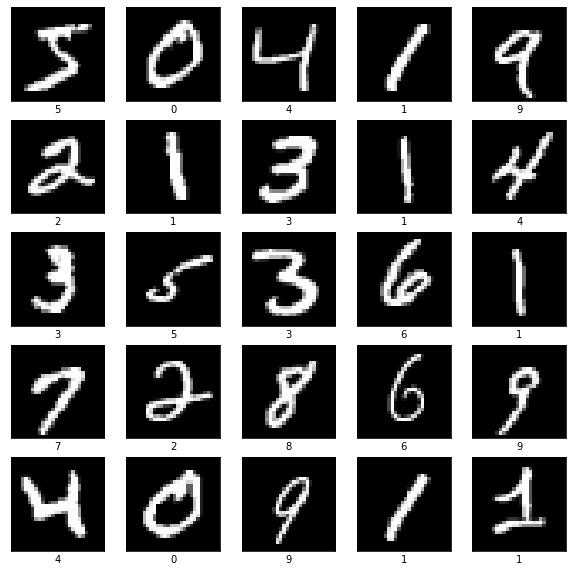

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()


##Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:


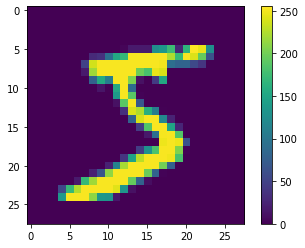

In [7]:
plt.figure()
plt.imshow(train_digits[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_digits = train_digits / 255.0

test_digits = test_digits / 255.0


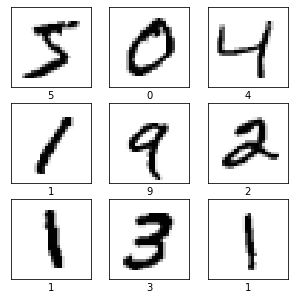

In [20]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [28]:

# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))


# one-hot encode the labels - we have 10 output classes
# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
from keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((60000, 10), (10000, 10))

In [0]:
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28

In [0]:
# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now set-aside 10% of the train_data/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))

# first pick validation set from train_data/labels
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]
# NOTE: We will train on train_data2/train_labels_cat2 and 


##Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

##Train the model

In [34]:
results = model.fit(train_data2, train_labels_cat2, epochs=15, batch_size=64,validation_data=(val_data, val_labels_cat))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/15





54000/54000 [==============================] - 78s 1ms/step - loss: 2.3018 - acc: 0.1117 - val_loss: 2.3018 - val_acc: 0.1115
Epoch 2/15
54000/54000 [==============================] - 77s 1ms/step - loss: 2.3015 - acc: 0.1125 - val_loss: 2.3014 - val_acc: 0.1115
Epoch 3/15
54000/54000 [==============================] - 78s 1ms/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3015 - val_acc: 0.1115
Epoch 4/15
54000/54000 [==============================] - 77s 1ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3015 - val_acc: 0.1115
Epoch 5/15
54000/54000 [==============================] - 77s 1ms/step - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3014 - val_acc: 0.1115
Epoch 6/15
54000/54000 [==============================] - 77s 1ms/step - loss: 2.3013 - acc: 0.1125 - val_loss: 2.3013 - val_acc: 0.1115
Epoch 7/15
54000/54000 [===

In [38]:
test_loss, test_acc = results.evaluate(test_digits,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


AttributeError: ignored

In [36]:
from __future__ import show_plots

SyntaxError: ignored

In [39]:
results.history

{'acc': [0.11170370370370371,
  0.11246296296296296,
  0.11233333333333333,
  0.11240740740740741,
  0.11246296296296296,
  0.11246296296406676,
  0.11246296296406676,
  0.11246296296296296,
  0.11246296296296296,
  0.11246296296737812,
  0.11246296296075538,
  0.11246296295854781,
  0.11246296296296296,
  0.11246296296517054,
  0.11246296296075538],
 'loss': [2.3018240655263265,
  2.3014587353600398,
  2.3013372509567827,
  2.301433390652692,
  2.301372846179538,
  2.3013269458346897,
  2.301296909261633,
  2.301285355815181,
  2.301321403220848,
  2.301291868774979,
  2.3012806323722557,
  2.3012838241435865,
  2.301277778696131,
  2.301279109813549,
  2.3012839067247177],
 'val_acc': [0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115,
  0.1115],
 'val_loss': [2.301836908976237,
  2.3013751424153646,
  2.3014971459706626,
  2.3015067882537843,
  2.301370320002238,
  2.301339678446452,
  2.301406496